---
# K Mean Clustering
---
## Input the library and Prepare the Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

In [2]:
df = pd.read_csv('D:/Study/UHD/6.Spring 2022/data 4319 final project/Major Project/1. Explore Data/df_workfile.csv')
# df.info()
df.drop(columns=df.columns[0], axis=1, inplace=True)

df.head()

,diagnosis,concave points_mean,concavity_mean,concave points_worst,compactness_mean,perimeter_worst,concavity_worst,radius_worst,perimeter_mean,area_worst,area_mean,fractal_dimension_mean
0,M,0.14710,0.3001,0.2654,0.27760,184.60,0.7119,25.38,122.80,2019.0,1001.0,0.07871
1,M,0.07017,0.0869,0.1860,0.07864,158.80,0.2416,24.99,132.90,1956.0,1326.0,0.05667
2,M,0.12790,0.1974,0.2430,0.15990,152.50,0.4504,23.57,130.00,1709.0,1203.0,0.05999
3,M,0.10520,0.2414,0.2575,0.28390,98.87,0.6869,14.91,77.58,567.7,386.1,0.09744
4,M,0.10430,0.1980,0.1625,0.13280,152.20,0.4000,22.54,135.10,1575.0,1297.0,0.05883


In [3]:
benign = df[df.diagnosis == 'B']
malignant = df[df.diagnosis == 'M']

Text(0.5, 1.0, 'Linearly Data')

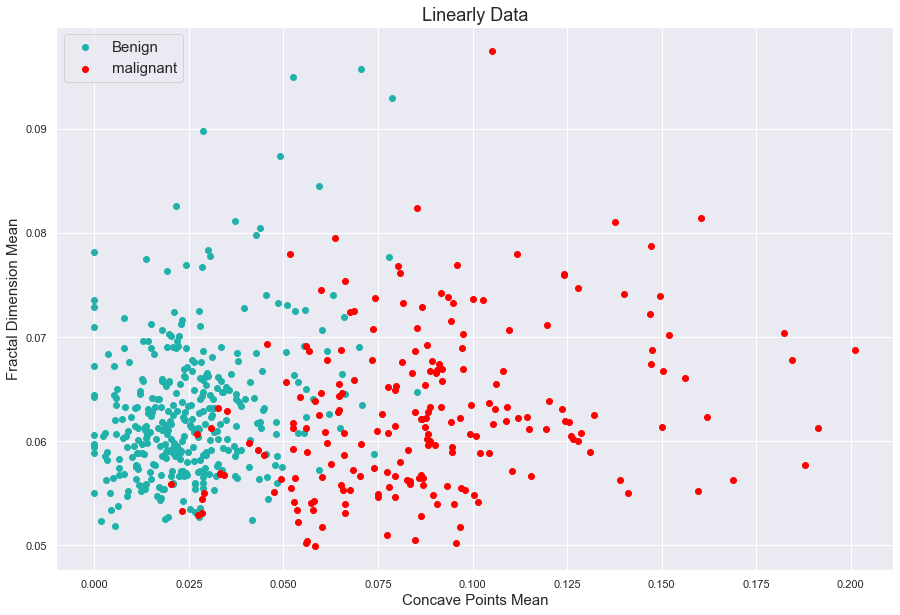

In [4]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15,10))

ax1.scatter(benign['concave points_mean'], 
            benign['fractal_dimension_mean'], 
            color = "lightseagreen", 
            label = "Benign")
ax1.scatter(malignant['concave points_mean'], 
            malignant['fractal_dimension_mean'], 
            color = "red", 
            label = "malignant")
ax1.set_xlabel("Concave Points Mean", fontsize = 15)
ax1.set_ylabel("Fractal Dimension Mean", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Data", fontsize = 18)

In [5]:
X = df[['concave points_mean', 'fractal_dimension_mean']].values
y = np.where(df.diagnosis == "B", 0, 1)


## II. Build a Machine Learning K Mean Clustering
1. To think ahead for the unexpected like the number of clusters fluctuating, I will set up a function to set the color for each cluster.

In [6]:
def colors(y):
    if y == 0:
        return "lightseagreen"
    elif y == 1:
        return "red"
    # elif y == 2:
    #     return "magenta"
    else:
        return "blue"

c = [colors(label) for label in y]

2. Before go directly in building a K mean cluster, lets take a look at the random center from the model

In [7]:
centers = []
for k in range(3):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i, 1], k)
    centers.append(point)
centers

[(0.1244, 0.06197, 0), (0.07951, 0.05461, 1), (0.007799, 0.07187, 2)]

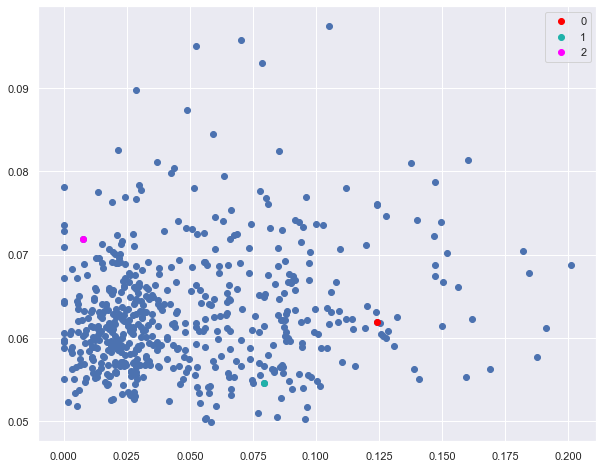

In [8]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
plt.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
plt.scatter([centers[2][0]], [centers[2][1]], color = "magenta", label = centers[2][2])
plt.legend()
plt.show()

3. Next will be the necessary functions for K mean clustering including:
   + distance: calculate the distance between k clusters
   + assign_label: to assign new labels to points when the centers are known.
   + assign_clusters: to assign new cluster to points when the centers are known.

In [9]:
def distance(i, X, center):
    return np.sqrt(sum((X[i, j] - center[j])**2 for j in range(2)))

def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])
    label = np.argmin(distances)
    return label 

def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]


 + update_centers: In addition, it is also indispensable to update new centers based on newly labeled data.

In [10]:
def update_centers(X, centers):
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1]) for i in center_means]

 + K_mean_clustering: one of the important steps of model K mean clustering

In [11]:
def k_means_clustering(X, k, max_iter = 100):
    centers = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)
    
    for _ in range(max_iter):
        centers = update_centers(X, centers)

    return centers

4. Find the optimal number of cluster
   + similar to find the k value for $K Nearest Neighboor$, we need to find the k_cluster for $k mean cluster$. 
   + By vary number of k_cluster in range of [a, b], then calculate for the sum of square distance between each point and the centroid in a cluster.
   + It will create an elbow shape. and we know the graph rapidly change at the a point and this is the k_value or can said it is the optimal number of cluster

Text(0, 0.5, 'WCS')

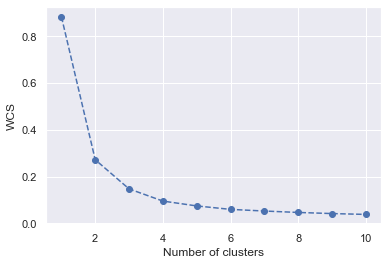

In [12]:
from sklearn.cluster import KMeans

wcss = [] # WCSS (Within-Cluster Sum of Square)

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss,'--ob')
plt.xlabel('Number of clusters')
plt.ylabel('WCS')

5. Since we identify the number of cluster, now we can visualize the model.

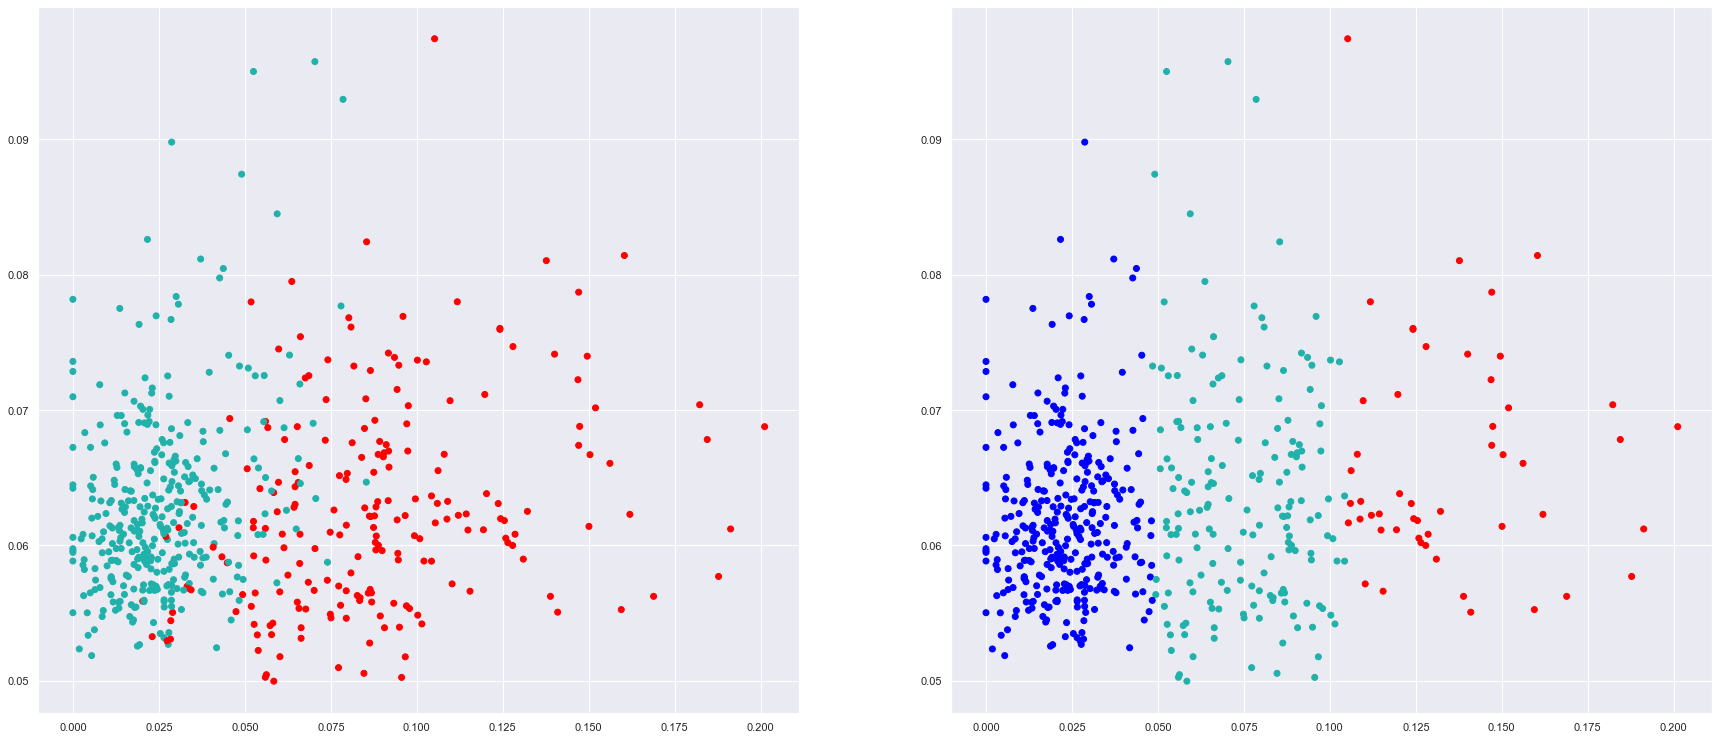

In [13]:
centers = k_means_clustering(X, 3)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (30, 13))
ax1.scatter(X[:, 0], X[:, 1], c = c)
ax2.scatter(X[:, 0], X[:, 1], c = current_colors)

plt.show()